## Classification Models-I 

----------------------------------------------------------------
Name: Dr. Sampath Lonka 

Date: August 20, 2022

----------------------------------------------------------------

In this tutorial, we disuss different classification models:

- Naive Bayes Algorithm
- Logistic Regression
- k-Nearest Neighbors

In [290]:
#load the libraries
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [291]:
#load the data 
data = pd.read_csv("E:\\Datasets\\BRCA.csv")
data1 = data.copy()
data.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [292]:
data.isnull().any()

Patient_ID            False
Age                   False
Gender                False
Protein1              False
Protein2              False
Protein3              False
Protein4              False
Tumour_Stage          False
Histology             False
ER status             False
PR status             False
HER2 status           False
Surgery_type          False
Date_of_Surgery       False
Date_of_Last_Visit     True
Patient_Status         True
dtype: bool

In [293]:
import plotly.express as px
from sklearn.model_selection import train_test_split

In [294]:
print(data.head())

     Patient_ID  Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD   36  FEMALE  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX   43  FEMALE -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079   69  FEMALE  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR   56  FEMALE  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF   56  FEMALE  0.221550   1.90680   0.52045 -0.311990   

  Tumour_Stage                      Histology ER status PR status HER2 status  \
0          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1           II             Mucinous Carcinoma  Positive  Positive    Negative   
2          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Date_of_Surgery Date_of_Last_Visit  \
0  Modified

In [295]:
data.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [296]:
data = data.dropna()

In [297]:
data.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    int64  
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float

In [299]:
data.Gender.value_counts()

FEMALE    313
MALE        4
Name: Gender, dtype: int64

In [300]:
#Tumour Stage
stage = data["Tumour_Stage"].value_counts()

In [301]:
stage

II     180
III     77
I       60
Name: Tumour_Stage, dtype: int64

In [302]:
transactions = stage.index
transactions

Index(['II', 'III', 'I'], dtype='object')

In [303]:
quantity = stage.values
quantity

array([180,  77,  60], dtype=int64)

In [304]:
# Tumour Stage
stage = data["Tumour_Stage"].value_counts()
transactions = stage.index
quantity = stage.values

figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Tumour Stages of Patients")
figure.show()

`Histology` is a description of a tumour based on how abnormal the cancer cells and tissue look under a microscope and how quickly cancer can grow and spread.

In [305]:
#Histology
histology = data["Histology"].value_counts()
trans_histo = histology.index 
quant_histo = histology.values  
figure = px.pie(data, 
                values=quant_histo, 
                names = trans_histo,
                hole = 0.5, 
                title="Histology of Patients")
figure.show()

In [306]:
# ER status
print(data["ER status"].value_counts())
# PR status
print(data["PR status"].value_counts())
# HER2 status
print(data["HER2 status"].value_counts())

Positive    317
Name: ER status, dtype: int64
Positive    317
Name: PR status, dtype: int64
Negative    288
Positive     29
Name: HER2 status, dtype: int64


In [307]:
#Surgery_type
surgery = data["Surgery_type"].value_counts()
trans_surgery = surgery.index
quant_surgery =surgery.values

figure = px.pie(data, 
                values = quant_surgery,
                names = trans_surgery,
                hole =0.5,  
                title = "Type of Surgery of Patients")
figure.show()

In [308]:
#Surgery_type
status = data["Patient_Status"].value_counts()
trans_status = status.index
quant_status =status.values

figure = px.pie(data, 
                values = quant_status,
                names = trans_status,
                hole =0.5,  
                title = "Patients Status")
figure.show()

In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    int64  
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float

In [310]:
#df = pd.get_dummies(data=data, columns=["Gender","Histology","ER status","PR status","HER2 status","Surgery_type"])

#df.head()

### Data Preprocessing

In [311]:

#Use pipelines
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer


encoder_tumour = OrdinalEncoder(categories = [['I','II','III']])

full_pipeline = ColumnTransformer([
    ("num",StandardScaler(),["Age"]),
    ("One-hot",OneHotEncoder(),["Gender","Histology","ER status","PR status","HER2 status","Surgery_type","Patient_Status"]),
    ("ordinal",encoder_tumour,["Tumour_Stage"])
])

df_prep = full_pipeline.fit_transform(data)
print(df_prep)
type(df_prep)

[[-1.77444592  1.          0.         ...  1.          0.
   2.        ]
 [-1.2278752   1.          0.         ...  0.          1.
   1.        ]
 [ 0.80224464  1.          0.         ...  1.          0.
   2.        ]
 ...
 [ 0.17759238  1.          0.         ...  0.          1.
   1.        ]
 [ 1.58305996  1.          0.         ...  0.          1.
   0.        ]
 [ 1.34881536  1.          0.         ...  0.          1.
   0.        ]]


numpy.ndarray

In [312]:
data.columns[1:]

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [313]:
df = pd.DataFrame(df_prep)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.774446,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0
1,-1.227875,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.802245,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
3,-0.212815,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.212815,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [314]:
#convert Nomial features into numeric using OheHot encoding
data1 = pd.get_dummies(data1, columns = ["Gender","Histology","ER status","PR status","HER2 status","Surgery_type","Patient_Status"],drop_first = True)
data1.head()

,Patient_ID,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Date_of_Surgery,Date_of_Last_Visit,Gender_MALE,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy,Patient_Status_Dead
0,TCGA-D8-A1XD,36,0.080353,0.42638,0.54715,0.273680,III,15-Jan-17,19-Jun-17,0,0,0,0,1,0,0,0
1,TCGA-EW-A1OX,43,-0.420320,0.57807,0.61447,-0.031505,II,26-Apr-17,09-Nov-18,0,0,1,0,0,0,0,1
2,TCGA-A8-A079,69,0.213980,1.31140,-0.32747,-0.234260,III,08-Sep-17,09-Jun-18,0,0,0,0,0,1,0,0
3,TCGA-D8-A1XR,56,0.345090,-0.21147,-0.19304,0.124270,II,25-Jan-17,12-Jul-17,0,0,0,0,1,0,0,0
4,TCGA-BH-A0BF,56,0.221550,1.90680,0.52045,-0.311990,II,06-May-17,27-Jun-19,0,0,0,0,0,1,0,1


In [315]:
#load StandardScalar from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data1[['Age']])
data1['Age'] = scaler.transform(data1[['Age']])

In [316]:
#ordinal encoding
encoder_tumour = OrdinalEncoder(categories = [['I','II','III']])
data1[["Tumour_Stage"]] = encoder_tumour.fit_transform(data1[["Tumour_Stage"]]) 
data1.head()

,Patient_ID,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Date_of_Surgery,Date_of_Last_Visit,Gender_MALE,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy,Patient_Status_Dead
0,TCGA-D8-A1XD,-1.768397,0.080353,0.42638,0.54715,0.273680,2.0,15-Jan-17,19-Jun-17,0,0,0,0,1,0,0,0
1,TCGA-EW-A1OX,-1.227513,-0.420320,0.57807,0.61447,-0.031505,1.0,26-Apr-17,09-Nov-18,0,0,1,0,0,0,0,1
2,TCGA-A8-A079,0.781481,0.213980,1.31140,-0.32747,-0.234260,2.0,08-Sep-17,09-Jun-18,0,0,0,0,0,1,0,0
3,TCGA-D8-A1XR,-0.223016,0.345090,-0.21147,-0.19304,0.124270,1.0,25-Jan-17,12-Jul-17,0,0,0,0,1,0,0,0
4,TCGA-BH-A0BF,-0.223016,0.221550,1.90680,0.52045,-0.311990,1.0,06-May-17,27-Jun-19,0,0,0,0,0,1,0,1


In [317]:
data1 = data1.drop(columns=["Patient_ID","Date_of_Surgery","Date_of_Last_Visit"])
data1.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Gender_MALE,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy,Patient_Status_Dead
0,-1.768397,0.080353,0.42638,0.54715,0.273680,2.0,0,0,0,0,1,0,0,0
1,-1.227513,-0.420320,0.57807,0.61447,-0.031505,1.0,0,0,1,0,0,0,0,1
2,0.781481,0.213980,1.31140,-0.32747,-0.234260,2.0,0,0,0,0,0,1,0,0
3,-0.223016,0.345090,-0.21147,-0.19304,0.124270,1.0,0,0,0,0,1,0,0,0
4,-0.223016,0.221550,1.90680,0.52045,-0.311990,1.0,0,0,0,0,0,1,0,1


### Modeling for Classification

We perform the following classifiers:
- Naive Bayes Classifier 
- Logistic Regression  

#### Naive Bayes Classification

- It's a classification algorithm for binary and multi-class classification problems 
- It is called Naive Bayes because the calculations of the probabilities for each class are simplified to make their calculations tractable. 
- Navie Bayes have the following assumptions: 
  - The prior probabilities for each class is either uniform or empirical
  - The likelihood probabilities are Gaussian
  - All the features (or predictors) are independent 
- It's works quickly and can save a lot of time and  suitable for solving multi-class prediction problems 
- If the independence of features holds true, Navie Bayes can perform better than other models and requires much less training data 
- It's better suited for categorical predictors than numerical variables  

#### Shortcomings of Naive Bayes CLasifier 

We have the following shortcomings:
- It assumes that all predictors (or features) are independent, rarely happening in real life. This limits the applicability of this algorithm in real-world use cases
- It faces the *zero-frequency problem* where it assigns zero probability to a categorical variable whose category in the test data wasn't available in the training dataset.
- To overcome, we can apply the smoothing technique (will be discussed in the next tutorial)
- The estimations can be wrong in some cases, so you shouldn't take its probability outputs very seriously. 

The Naive Bayes is broken down into five parts:
- Separate By Class 
- Summarize Dataset 
- Summarize Data by Class 
- Gaussian Probability Density Function 
- Class Probabilities 

In [318]:
#shuffle the pre-processed data  
data1 = data1.sample(frac=1)
data1

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Gender_MALE,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy,Patient_Status_Dead
238,-1.459321,0.336260,1.71960,0.439510,-0.342190,1.0,0,0,0,0,0,0,0,1
216,0.008791,0.715270,2.19120,0.391580,0.951980,1.0,0,0,0,0,1,0,0,0
136,-0.377554,0.326710,-0.29499,1.769100,0.770870,1.0,0,0,0,0,1,0,0,0
107,0.317867,-0.523030,1.76400,-0.370190,0.010815,1.0,0,0,0,0,0,0,0,0
327,-0.995706,-0.055036,-0.50643,0.887780,-0.089424,1.0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0.936020,0.394090,1.70540,0.035642,1.441000,1.0,0,1,0,0,1,0,0,0
101,-1.304783,-0.175610,0.28963,1.129000,-0.382240,0.0,0,0,0,0,0,0,1,0
146,0.936020,0.418620,-0.25258,-0.241000,-0.207630,2.0,0,0,0,0,0,0,1,0
290,-0.995706,0.003977,1.20380,-0.413500,0.529080,2.0,0,0,0,0,1,0,0,0


In [319]:
#split the data into train and test
n = int(data1.shape[0]* 0.8)
data_train = data1[:n]
data_test = data1[n:] 

In [320]:
#convert to list 
train_list = data_train.values.tolist() 
test_list = data_test.values.tolist()

In [321]:
# ratio of observations for each class in train dataset
data_train.iloc[:,-1].value_counts()/data_train.iloc[:,-1].value_counts().sum()

0    0.786517
1    0.213483
Name: Patient_Status_Dead, dtype: float64

In [322]:
# ratio of observations for each class in test dataset
data_test.iloc[:,-1].value_counts()/data_test.iloc[:,-1].value_counts().sum()

0    0.865672
1    0.134328
Name: Patient_Status_Dead, dtype: float64

We always care that the ratio of the classes in the both train and test samples are almost same. In given dataset, we have 81%,19% for the training and 79%, 21% for testing.  

In [323]:
# Test separating data by class
dataset = [[3.393533211,2.331273381,0],
	[3.110073483,1.781539638,0],
	[1.343808831,3.368360954,0],
	[3.582294042,4.67917911,0],
	[2.280362439,2.866990263,0],
	[7.423436942,4.696522875,1],
	[5.745051997,3.533989803,1],
	[9.172168622,2.511101045,1],
	[7.792783481,3.424088941,1],
	[7.939820817,0.791637231,1]]

### Summarize Dataset 

In [324]:
#import all functions from math library 
from math import * 

In [325]:
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated
 
# Calculate the mean of a list of numbers
def mean(numbers):
	return sum(numbers)/float(len(numbers))
 
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)
 
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries
 
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries
 
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent
 
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, _ = class_summaries[i]
			probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
	return probabilities
 
# Predict the class for a given row
def predict(summaries, row):
	probabilities = calculate_class_probabilities(summaries, row)
	best_label, best_prob = None, -1
	for class_value, probability in probabilities.items():
		if best_label is None or probability > best_prob:
			best_prob = probability
			best_label = class_value
	return best_label
 
# Naive Bayes Algorithm
def naive_bayes(train, test):
	summarize = summarize_by_class(train)
	predictions = list()
	for row in test:
		output = predict(summarize, row)
		predictions.append(output)
	return(predictions)

In [326]:
naive_bayes(train_list, test_list)

[0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [327]:
#Naive Bayes Algorithm
def naive_Bayes(train, test):
    summarize = summarize_by_class(train)
    predictions = list()
    for row in test:
        output = predict(summarize,row) 
        predictions.append(output)  
    return (predictions)

In [328]:
predictions = naive_Bayes(train_list, test_list)
y = data_test.iloc[:,-1].values.tolist() 
results = pd.DataFrame({"y_actual":y, "y_pred":predictions})
results.head()

,y_actual,y_pred
0,0,0.0
1,0,0.0
2,0,1.0
3,0,0.0
4,0,0.0


In [329]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

In [330]:
accuracy_metric(y,predictions)

77.61194029850746

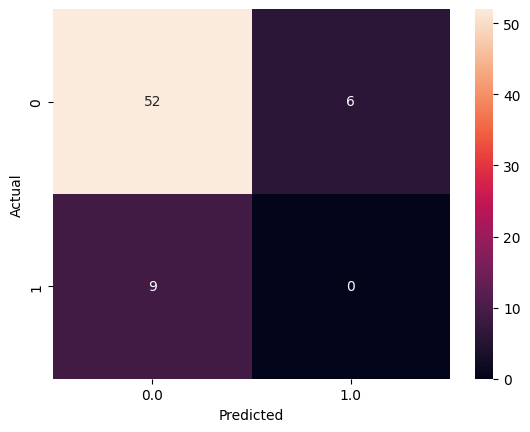

In [331]:
import seaborn as sn
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(results['y_actual'], results['y_pred'], rownames=["Actual"], colnames=["Predicted"])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [332]:
data1.columns

Index(['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'Tumour_Stage',
       'Gender_MALE', 'Histology_Infiltrating Lobular Carcinoma',
       'Histology_Mucinous Carcinoma', 'HER2 status_Positive',
       'Surgery_type_Modified Radical Mastectomy', 'Surgery_type_Other',
       'Surgery_type_Simple Mastectomy', 'Patient_Status_Dead'],
      dtype='object')

In [333]:
X = data1.drop("Patient_Status_Dead",axis=1).values
y = data1[['Patient_Status_Dead']].values 

In [334]:
X.shape

(334, 13)

In [335]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,shuffle=True,random_state=5,test_size=0.2)

In [336]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [337]:
model = GaussianNB() 
model.fit(Xtrain,ytrain.ravel())  
y_pred = model.predict(Xtest) 

#### Confusion Matrix

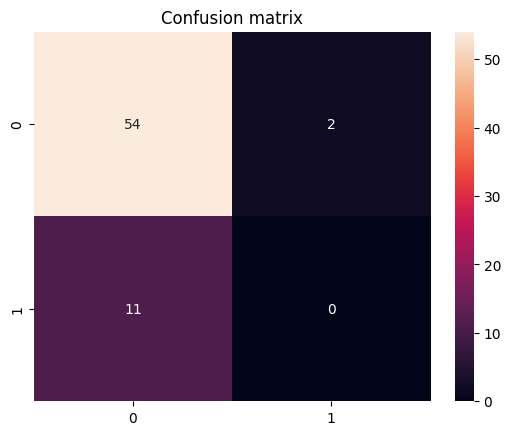

In [338]:
from sklearn.metrics import confusion_matrix
#acc = accuracy(Xtest, ytest) 
classes = [0, 1]  
cm = confusion_matrix(ytest,y_pred, labels=classes)
sn.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [339]:
report = classification_report(ytest, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        56
           1       0.00      0.00      0.00        11

    accuracy                           0.81        67
   macro avg       0.42      0.48      0.45        67
weighted avg       0.69      0.81      0.75        67



In [340]:
from sklearn.metrics import precision_score, recall_score
precision_score(ytest,y_pred) 

0.0

In [341]:
recall_score(ytest, y_pred)

0.0

In [342]:
from sklearn.metrics import f1_score
f1_score(ytest, y_pred)

0.0

### Precision-Recall Trade-Off 


In [343]:
from sklearn.metrics import precision_recall_curve

precisions ,recalls, thresholds = precision_recall_curve(ytest, y_pred)

In [344]:
thresholds

array([0, 1], dtype=uint8)

In [345]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, Xtrain, ytrain.ravel(), cv=3,scoring="accuracy")


array([0.69662921, 0.76404494, 0.75280899])

In [346]:
from sklearn.model_selection import cross_val_predict

ytrain_pred = cross_val_predict(model, Xtrain, ytrain.ravel(),cv=3)

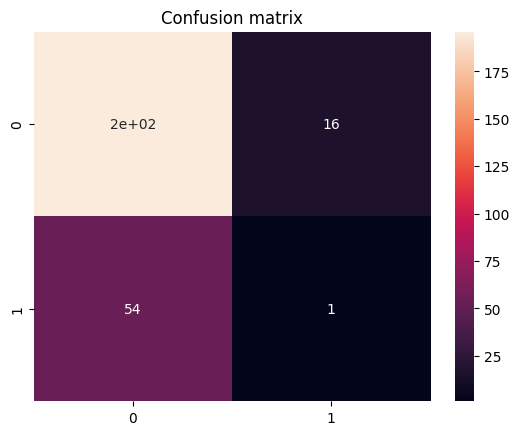

In [347]:
#confusion matrix
cm = confusion_matrix(ytrain, ytrain_pred)
sn.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [348]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytrain, ytrain_pred)


0.4713550600343053

### Logistic Regression

In [349]:
import numpy as np 


In [350]:
#shape of train and test samples 
print(f"No. of training samples: {Xtrain.shape[0]}")
print(f"No. of testing samples: {Xtest.shape[0]}")

No. of training samples: 267
No. of testing samples: 67


In [351]:
# loss function
def bce_loss(y,yhat):
    ''' 
    Binary Cross Entropy
    ''' 
    m = y.shape[0]
    return -(1/m)*np.sum(y*np.log(yhat)+(1-y)*np.log(1-yhat))


# sigmoid function 
def sigmoid(z):
    return 1/(1+np.exp(-z)) 

# fit the model 

def fit(X,y, iters=100, lr=0.01): 
    m = X.shape[0]  
    n = X.shape[1] 
    # the shape of augmented matrix is mx(k+1)
    X_aug = np.hstack([np.ones((m,1)),X])
    
    # initialize parameters
    weights = np.random.rand(n+1).reshape(-1,1)
    loss_hist = []
    for i in range(iters):
        z = np.dot(X_aug, weights)
        yhat = sigmoid(z) + 0.00001 #to avoid the log function 
        loss = bce_loss(y, yhat) 
        loss_hist.append(loss) 
        
        #partial derivative 
        dw = (1/m)*(2*np.dot(X_aug.T,(yhat-y))) 
        
        #update the weights 
        weights -= np.dot(lr,dw) 
        
        #if i%10 == 0:
        #    print(f"The Loss after iteration {i} is : {loss}")
    return weights, loss_hist          
    

In [352]:
# calculate the prediction probabilities 
def pred_probs(X, weights):
    m = X.shape[0]
    # the shape of augmented matrix is nx(k+1)
    X_aug = np.hstack([np.ones((m,1)),X])
    z = np.dot(X_aug, weights)
    #print(z.shape)
    return sigmoid(z) 

#predict the final outcome
def predict(X, weights, theta=0.5):
    m = X.shape[0]
    #print(m)
    # the shape of augmented matrix is nx(k+1)
    X_aug = np.hstack([np.ones((m,1)),X])
    probabilities = pred_probs(X, weights) 
    predictions = [1 if i > theta else 0 for i in probabilities]
    #predictions = np.asarray(predictions)
    return predictions

In [353]:
wts,loss_hist = fit(Xtrain, ytrain)
print(loss_hist)

[1.5350009642354725, 1.5127798486615687, 1.4909592890709573, 1.4695395864742202, 1.4485206886268756, 1.4279021931016098, 1.4076833514811342, 1.3878630746210547, 1.3684399389297202, 1.349412193610051, 1.330777768806682, 1.3125342846002954, 1.2946790607896577, 1.2772091274005533, 1.2601212358595333, 1.243411870769162, 1.2270772622202373, 1.2111133985754257, 1.1955160396578424, 1.1802807302774458, 1.1654028140277646, 1.150877447285452, 1.1366996133455731, 1.1228641366263568, 1.1093656968784402, 1.0961988433354455, 1.0833580087449373, 1.070837523221567, 1.0586316278673267, 1.046734488107383, 1.0351402066938349, 1.0238428363339083, 1.01283639190349, 1.002114862211463, 0.9916722212849519, 0.9815024391502842, 0.9715994920891318, 0.9619573723538676, 0.952570097330618, 0.9434317181427375, 0.9345363276914666, 0.9258780681342902, 0.9174511378050113, 0.9092497975827174, 0.9012683767196893, 0.893501278140832, 0.8859429832294252, 0.8785880561158805, 0.8714311474877878, 0.8644669979408082, 0.85769044

In [354]:
from matplotlib import pyplot as plt 
def plot_loss(X,y,iters=100,lr=0.01):
    _, loss_hist = fit(X,y, iters, lr)  
    x = range(iters)
    plt.plot(x, loss_hist,"r-")
    plt.title(f"The learning rate: {lr} and iterations: {iters}")
    plt.xlabel("Number of iterations")
    plt.ylabel("Loss")
    plt.show() 

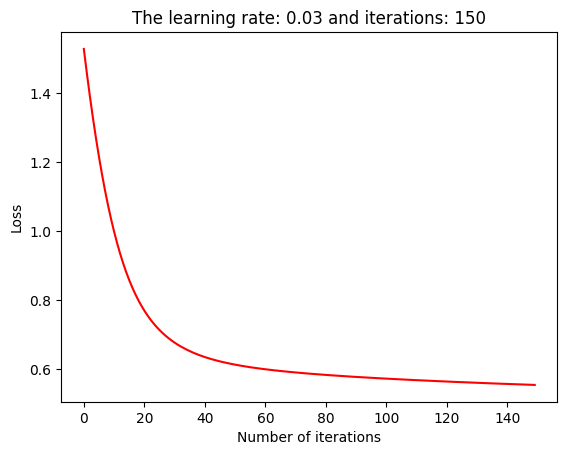

In [355]:
plot_loss(Xtrain,ytrain,iters=150, lr=0.03)  

In [356]:
wts,_ = fit(X,y, iters=150, lr =0.03) 

In [357]:
pred_probs(Xtest,wts)

array([[0.33111326],
       [0.14572596],
       [0.48660468],
       [0.23713105],
       [0.20250212],
       [0.32917563],
       [0.27994904],
       [0.18994106],
       [0.22638185],
       [0.09698541],
       [0.0868381 ],
       [0.46878987],
       [0.1673715 ],
       [0.25157992],
       [0.33726265],
       [0.26365972],
       [0.45367298],
       [0.15924708],
       [0.10420286],
       [0.34504831],
       [0.2615778 ],
       [0.20566008],
       [0.08960494],
       [0.23716041],
       [0.18518442],
       [0.06851974],
       [0.21772465],
       [0.27504991],
       [0.14921735],
       [0.22514395],
       [0.17345175],
       [0.52020293],
       [0.13628885],
       [0.26440173],
       [0.28883343],
       [0.14602484],
       [0.1894122 ],
       [0.29915137],
       [0.21072151],
       [0.26260197],
       [0.36551558],
       [0.34699912],
       [0.14111686],
       [0.12161116],
       [0.43595703],
       [0.23747516],
       [0.06058655],
       [0.323

In [358]:
ypred = predict(Xtest, wts, theta=0.4)
print(ypred)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [359]:
ytest = ytest.flatten().tolist()
print(ytest)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [360]:
results = pd.DataFrame([(a, b) for a, b in zip(ytest,ypred)],
                  columns=['y_act','y_pred'])
results

,y_act,y_pred
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
62,0,0
63,0,0
64,0,0
65,0,0


In [361]:
acc = sum(results["y_act"]==results["y_pred"])/results.shape[0]
print(acc)

0.7611940298507462


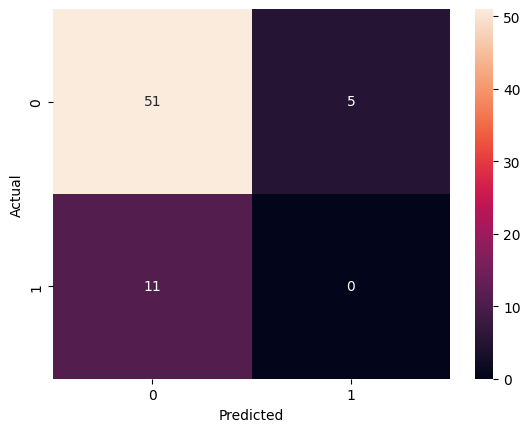

In [362]:
import seaborn as sn
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(results['y_act'], results['y_pred'], rownames=["Actual"], colnames=["Predicted"])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [363]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [364]:
#pre-processed data
data1.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Gender_MALE,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy,Patient_Status_Dead
238,-1.459321,0.336260,1.71960,0.43951,-0.342190,1.0,0,0,0,0,0,0,0,1
216,0.008791,0.715270,2.19120,0.39158,0.951980,1.0,0,0,0,0,1,0,0,0
136,-0.377554,0.326710,-0.29499,1.76910,0.770870,1.0,0,0,0,0,1,0,0,0
107,0.317867,-0.523030,1.76400,-0.37019,0.010815,1.0,0,0,0,0,0,0,0,0
327,-0.995706,-0.055036,-0.50643,0.88778,-0.089424,1.0,0,0,0,0,0,0,0,1


In [365]:
data1.columns

Index(['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'Tumour_Stage',
       'Gender_MALE', 'Histology_Infiltrating Lobular Carcinoma',
       'Histology_Mucinous Carcinoma', 'HER2 status_Positive',
       'Surgery_type_Modified Radical Mastectomy', 'Surgery_type_Other',
       'Surgery_type_Simple Mastectomy', 'Patient_Status_Dead'],
      dtype='object')

In [366]:
# load features
X = data1.drop('Patient_Status_Dead',axis=1).values
y = data1[['Patient_Status_Dead']].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=5)
print(f"The shape of training data: {Xtrain.shape}")
print(f"The shape of testing data: {Xtest.shape}")

The shape of training data: (267, 13)
The shape of testing data: (67, 13)


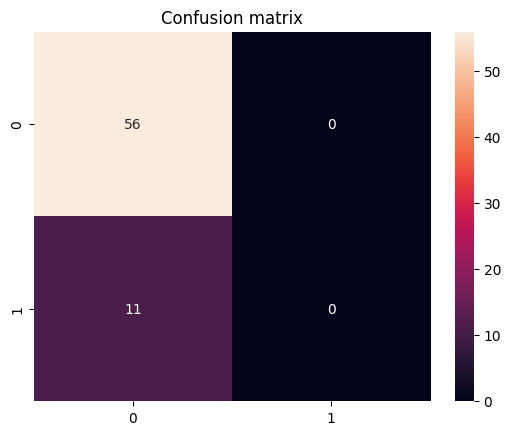

In [368]:
#model
model = LogisticRegression()
model.fit(Xtrain, ytrain.ravel())
ypred = model.predict(Xtest) 
#confusion matrix
cm = confusion_matrix(ytest, ypred)
sn.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

## Evaltion of a model

We discuss in the next tutorial